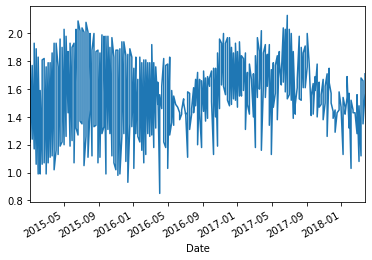

In [1]:
import pandas as pd

df = pd.read_csv('../datasets/avocado.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
albany_df = df.copy()[df['region'] == 'Albany']
albany_df['AveragePrice'].plot()

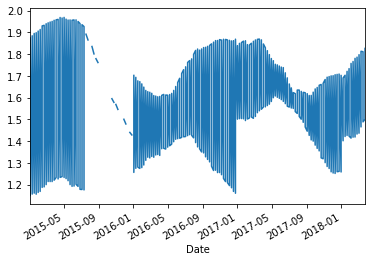

In [2]:
# Smoothing out the graph by replacing each successive block of observations (window)
# with a mean of that block.

# Dates are not sorted therefore the graps looks kind of weird.
albany_df['AveragePrice'].rolling(25).mean().plot()

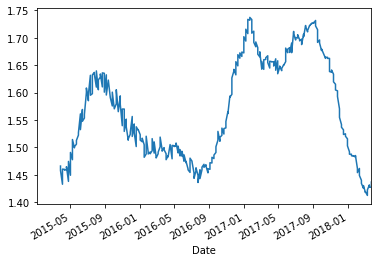

In [3]:
# Sorting the data based on the index.
albany_df.sort_index(inplace=True)
albany_df['AveragePrice'].rolling(25).mean().plot()

In [4]:
# Add the block mean as a new column to our dataset.
# This will produce some NaN values because we don't have mean for the first 24 observations.
albany_df['price25ma'] = albany_df['AveragePrice'].rolling(25).mean()
albany_df.dropna()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2015-03-29,39,1.93,1082.44,24.75,173.26,0.00,884.43,884.43,0.00,0.00,organic,2015,Albany,1.4660
2015-03-29,39,1.02,67799.08,1402.28,58623.22,89.50,7684.08,7208.49,475.59,0.00,conventional,2015,Albany,1.4580
2015-04-05,38,1.16,47362.13,961.77,35577.66,93.76,10728.94,9869.16,755.61,104.17,conventional,2015,Albany,1.4328
2015-04-05,38,1.93,1526.10,15.75,202.52,0.00,1307.83,1307.83,0.00,0.00,organic,2015,Albany,1.4604
2015-04-12,37,1.76,1634.59,51.75,93.38,0.00,1489.46,1489.46,0.00,0.00,organic,2015,Albany,1.4600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-11,2,1.68,2570.52,131.67,229.56,0.00,2209.29,2209.29,0.00,0.00,organic,2018,Albany,1.4224
2018-03-18,1,1.66,3154.45,275.89,297.96,0.00,2580.60,2577.27,3.33,0.00,organic,2018,Albany,1.4316
2018-03-18,1,1.35,105304.65,13234.86,61037.58,55.00,30977.21,26755.90,3721.31,500.00,conventional,2018,Albany,1.4276


In [22]:
# plotting average price for each region
import pandas as pd

df = pd.read_csv('../datasets/avocado.csv')
df = df.copy()[df['type'] == 'organic']
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_values(by='Date', inplace=True)

graph_df = pd.DataFrame()

for region in df['region'].unique():
    region_df = df.copy()[df['region'] == region]
    region_df[f'{region}_price25ma'] = region_df['AveragePrice'].rolling(25).mean()
    
    if graph_df.empty:
        graph_df = region_df[[f'{region}_price25ma']]
    else:
        graph_df = graph_df.join(region_df[f'{region}_price25ma'])
        
graph_df.tail()

,California_price25ma,LasVegas_price25ma,PhoenixTucson_price25ma,BuffaloRochester_price25ma,Spokane_price25ma,LosAngeles_price25ma,Philadelphia_price25ma,Boston_price25ma,StLouis_price25ma,Louisville_price25ma,...,Houston_price25ma,Chicago_price25ma,Plains_price25ma,Indianapolis_price25ma,SouthCentral_price25ma,Columbus_price25ma,Albany_price25ma,Detroit_price25ma,NewOrleansMobile_price25ma,NewYork_price25ma
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-25,1.9128,1.9120,1.7468,1.2912,2.1544,1.9024,1.6324,1.7636,1.9240,1.7044,...,1.6132,1.8160,1.8116,1.4928,1.5728,1.6064,1.5112,1.4980,1.5384,1.9308
2018-03-04,1.8876,1.8748,1.7404,1.2744,2.1040,1.8656,1.6260,1.7708,1.8868,1.6816,...,1.5960,1.8024,1.7900,1.4744,1.5592,1.5804,1.4992,1.4692,1.5288,1.9156
2018-03-11,1.8636,1.8440,1.7324,1.2652,2.0552,1.8284,1.6300,1.7824,1.8468,1.6508,...,1.5696,1.7836,1.7672,1.4540,1.5400,1.5496,1.5044,1.4444,1.5076,1.9092
2018-03-18,1.8516,1.8204,1.7216,1.2560,2.0012,1.8160,1.6304,1.7932,1.8192,1.6176,...,1.5360,1.7732,1.7452,1.4320,1.5204,1.5088,1.5140,1.4092,1.4860,1.8948
2018-03-25,1.8364,1.7968,1.7104,1.2416,1.9496,1.8016,1.6256,1.7984,1.7976,1.5844,...,1.5128,1.7672,1.7232,1.4160,1.5072,1.4848,1.5188,1.3964,1.4616,1.8876


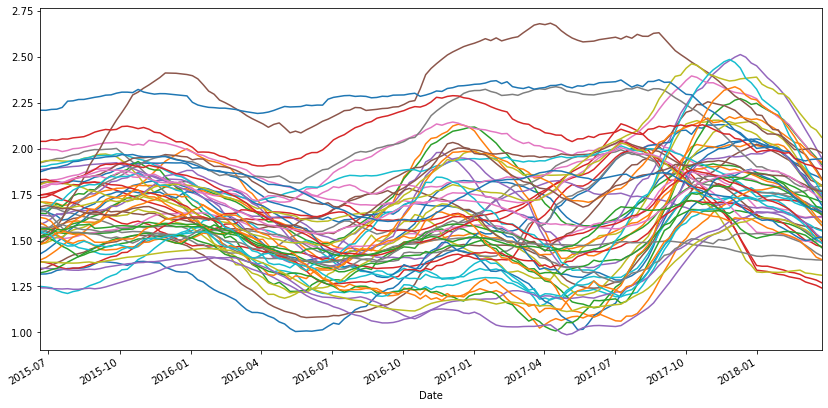

In [28]:
graph_df.dropna().plot(figsize=(14,7), legend=False)